In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler

In [ ]:
m=np.array([[1,1,1,0,0],
            [3,3,3,0,0],
            [4,4,4,0,0],
            [5,5,5,0,0],
            [0,2,0,4,4],
            [0,0,0,5,5],
            [0,1,0,2,2]])

 Understand the data by plotting in 3D space

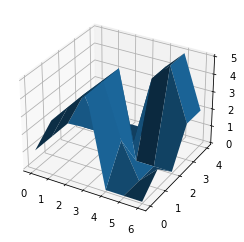

In [ ]:
x = range(m.shape[0])
y = range(m.shape[1])
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ha.plot_surface(X.T, Y.T, m)
plt.show()

Centering the Dataset

In [ ]:
# preprocessing
m_centered = m - m.mean(axis=0)

SVD

In [ ]:
u,s,v=np.linalg.svd(m_centered)

In [ ]:
# squaring the singular values to get eigenvalues
eig_vals_svd = np.square(s)

Plot the eigenvalues (note: the singular values are the square-root of the
eigenvalues) and select the right number K of principal components. What number
do you choose for K ? Explain your choice.
- K = 2 as the bend occurs at index 1. So most of the information is in the first 2 eigenvectors.

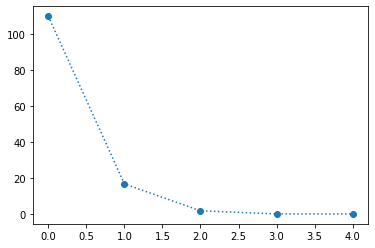

In [ ]:
plt.plot(eig_vals_svd, marker = 'o', linestyle = 'dotted')
plt.show()

Calculate the compressed data with the K you choose from step 4

In [ ]:
W2 = v.T[:, :2]
m2d = m_centered.dot(W2)
print("Compressed Data")
print(m2d)

[[ 0.14417203 -2.82787396]
 [ 2.7775391  -0.57977689]
 [ 4.09422264  0.54427165]
 [ 5.41090617  1.66832018]
 [-4.07253971  1.16872711]
 [-5.73177463  1.41792961]
 [-2.6225256  -1.3915977 ]]


In [ ]:
print(W2)

[[ 0.47149619  0.35583229]
 [ 0.37369115  0.41238396]
 [ 0.47149619  0.35583229]
 [-0.45592631  0.53698521]
 [-0.45592631  0.53698521]]


Implement PCA by directly computing the eigenvectors (V) and eigenvalues (D) from
covariance matrix – Solution2

In [ ]:
e_val, e_vec = np.linalg.eig(m_centered.T.dot(m_centered))

In [ ]:
# sorting the eigenvalues and vectors
sorted_index = np.argsort(e_val)[::-1]
sorted_eigenvalue = e_val[sorted_index]
sorted_eigenvectors = e_vec[sorted_index]

In [ ]:
print(sorted_eigenvalue)

[1.10092534e+02 1.67255279e+01 1.75336647e+00 4.56345281e-15
 1.23259516e-32]


In [ ]:
print(sorted_eigenvectors)

[[ 4.71496193e-01  3.55832289e-01 -7.07106781e-01  3.88683319e-01
   2.03051976e-03]
 [ 3.73691150e-01  4.12383958e-01 -3.88138543e-15 -8.30839573e-01
   1.54327668e-17]
 [-4.55926313e-01  5.36985212e-01  4.98935683e-16  6.14660890e-02
  -7.07103866e-01]
 [ 4.71496193e-01  3.55832289e-01  7.07106781e-01  3.88683319e-01
  -2.03051976e-03]
 [-4.55926313e-01  5.36985212e-01  4.98935683e-16  6.14660890e-02
   7.07103866e-01]]
